<a href="https://colab.research.google.com/github/csantos2435/Project_Medicine/blob/main/Extra%C3%A7%C3%A3o_Padr%C3%A3o_PI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Extração Padrão PI - 6° Semestre**

---


**Integrantes do Grupo:**
* Camilli Ramos dos Santos
* Ana Beatriz dos Santos
* Moisés Verissimo de Souza

**Link base consumida:**

 https://www.kaggle.com/datasets/kaushil268/disease-prediction-using-machine-learning


**Informações Base de Dados**
* **Descrição:** Disease Prediction Using Machine Learning (Previsão de Doenças)
* **Quantidade de atributos:** 133
* **Quantidade de registros:** 4920
* **Doenças Previstas(Classe):** 42
* **Breve descrição:**
Um conjunto de dados com intuito de fornecer o diagnótico de uma possível doença, caso a mesma possua sintomas de uma doença específica ou esteja saudável, a base de dados usará os sintomas informado pelo paciente afim de prever o diagósntico.

  Para esta conclusão são fornecidos 133 tipos de sintomas(atributos) com valores igual a: **1** - (Possui sintoma) / **0** - (Não possui sintoma)
  
  Logo, deve ser fornecido pelo paciente conforme suas dores.

In [18]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Importando bibliotecas e o DataFrame gerado pelo Pré-Processamento.

In [19]:
# IMPORTANDO TODAS AS BIBLIOTECAS IMPORTANTES PARA CÁLCULO E CRIAÇÃO DE VISUALIZAÇÃO GRÁFICA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# IMPORTANDO ARQUIVO
df = pd.read_csv('/content/drive/My Drive/PI - 6 DSM/previsao_doencas.csv')
df.head()

,coceira,erupcao_cutanea,erupcoes_cutaneas_nodais,espirros_continuos,tremores,calafrios,dor_nas_articulacoes,dor_de_estomago,acidez,ulceras_na_lingua,...,cravos,escorrimento,descamacao_da_pele,poeira_prateada,pequenos_amassados_nas_unhas,unhas_inflamatorias,bolha,ferida_vermelha_ao_redor_do_nariz,exsudacao_de_crosta_amarela,prognostico
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Gastroenteritis
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Hypothyroidism
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chicken pox
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Cervical spondylosis


### **Informações do DataFrame**

  Neste processo realizamos a listagem de informações relacionadas ao DataFreme, logo o objetivo é realizar uma análise dos dados após o Pré-processamento

In [20]:
# DIMENSÃO
print(df.shape)

################################################################################

# RESUMO ESTATÍSTICO
print(df.describe())

################################################################################

# DISTRIBUIÇÃO DE CLASSE
print(df.groupby('prognostico').size())

(2345, 133)
           coceira  erupcao_cutanea  erupcoes_cutaneas_nodais  \
count  2345.000000      2345.000000               2345.000000   
mean      0.138166         0.164606                  0.024733   
std       0.345148         0.370903                  0.155345   
min       0.000000         0.000000                  0.000000   
25%       0.000000         0.000000                  0.000000   
50%       0.000000         0.000000                  0.000000   
75%       0.000000         0.000000                  0.000000   
max       1.000000         1.000000                  1.000000   

       espirros_continuos     tremores    calafrios  dor_nas_articulacoes  \
count         2345.000000  2345.000000  2345.000000           2345.000000   
mean             0.046482     0.023028     0.161620              0.149254   
std              0.210571     0.150023     0.368181              0.356414   
min              0.000000     0.000000     0.000000              0.000000   
25%              

### **Visualização dos dados**

Neste processo geramos os gráficos referente as informações do conjunto de dados

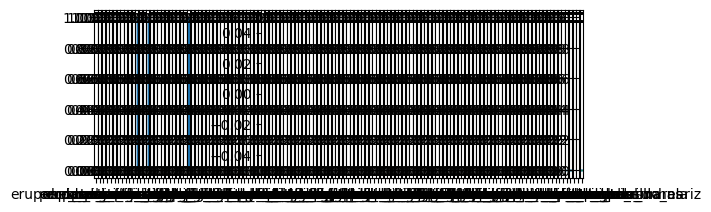

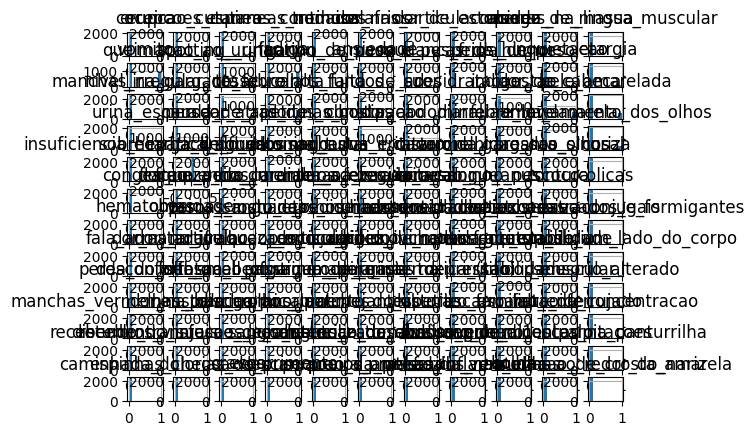

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/misc.py:100: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/misc.py:101: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/misc.py:91: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


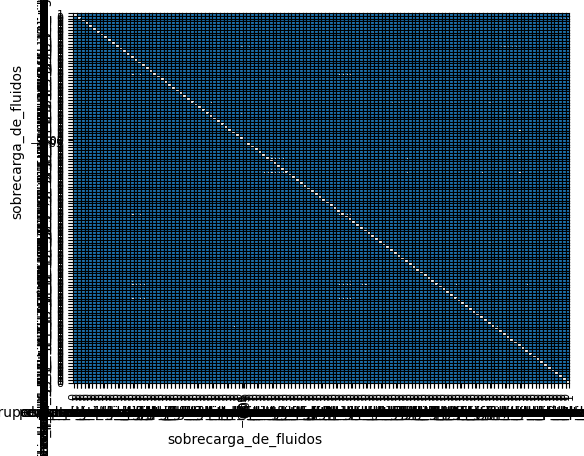

In [21]:
#GRÁFICO DE BOX AND WHISKER
df.plot(kind='box', subplots=True, layout=(2,134), sharex=False, sharey=False)
plt.show()

################################################################################

# HISTOGRAMA
df.hist()
plt.show()

################################################################################

# GRÁFICO DE DISPERSÃO
scatter_matrix(df)
plt.show()

### **Criar conjunto de validação**

  Após uma análise cuidadosa dos dados do DataFreme, avançamos para a etapa de seleção e preparação do conjunto de validação. Este conjunto, essencial para garantir a precisão e a generalização dos modelos construídos, consiste em uma parcela estratégica dos dados originalmente coletados.

In [22]:
# CONJUNTO DE VALIDAÇÃO
X = df.drop('prognostico', axis=1)
Y = df['prognostico']
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

print(X_train.shape)
print(Y_train.shape)

print(X_validation.shape)
print(Y_validation.shape)

(1876, 132)
(1876,)
(469, 132)
(469,)


In [23]:
# MÉTRICAS
seed = 7
scoring = 'accuracy'

### Regressão Logística (LR)
### Análise Linear Discriminante (LDA)
### K-vizinhos mais próximos (KNN)
### Árvores de Classificação (Decision Tree) e Regressão (CART)
### Gaussian Naive Bayes (NB)
### Support Vector Machines (SVM)

In [24]:
# ALGORITMOS
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

# AVALIAÇÃO DE CADA MODELO
results = []
names = []
for name, model in models:
   kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=42)
   cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
   results.append(cv_results)
   names.append(name)
   msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
   print(msg)

   #print(cv_results)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was depre

LR: 1.000000 (0.000000)
LDA: 0.992530 (0.008343)
KNN: 1.000000 (0.000000)
CART: 0.985596 (0.009579)
NB: 0.999465 (0.001604)
SVM: 1.000000 (0.000000)


## **Análise de Algoritmos**

  Nesta etapa crucial, procedemos com a comparação dos algoritmos em relação aos dados do DataFreme, utilizando o gráfico para visualizar suas performances. Cada algoritmo obteve distintos padrões de desempenho no processo de aprendizado. Através da comparação direta, podemos identificar quais algoritmos se destacam em termos de precisão, eficiência computacional e capacidade de generalização. Logo, esta análise serve para orientar na seleção do modelo mais adequado para as necessidades específicas do projeto de previsão de doenças.


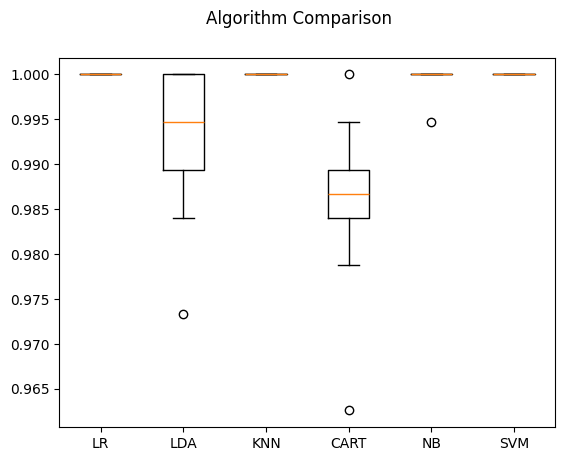

In [25]:
# COMPARAÇÃO DOS ALGORITMOS
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## **Algoritmo - LR**
---
Aprendizagem - 100%

In [26]:
# MODELO => LR
lr = LogisticRegression(solver='liblinear', multi_class='ovr')
lr.fit(X_train, Y_train)
predictions = lr.predict(X_validation)

print()
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions, zero_division=1))


1.0
[[ 5  0  0 ...  0  0  0]
 [ 0  6  0 ...  0  0  0]
 [ 0  0 16 ...  0  0  0]
 ...
 [ 0  0  0 ... 15  0  0]
 [ 0  0  0 ...  0 17  0]
 [ 0  0  0 ...  0  0 16]]
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         5
                                   AIDS       1.00      1.00      1.00         6
                                   Acne       1.00      1.00      1.00        16
                    Alcoholic hepatitis       1.00      1.00      1.00         6
                                Allergy       1.00      1.00      1.00        14
                              Arthritis       1.00      1.00      1.00         8
                       Bronchial Asthma       1.00      1.00      1.00        10
                   Cervical spondylosis       1.00      1.00      1.00        10
                            Chicken pox       1.00      1.00      1.00        16
                    Chronic 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


## **Algoritmo - LDA**
---
Aprendizagem - 99%

In [27]:
# MODELO => LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)
predictions = lda.predict(X_validation)

print()
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions, zero_division=1))


0.997867803837953
[[ 5  0  0 ...  0  0  0]
 [ 0  6  0 ...  0  0  0]
 [ 0  0 16 ...  0  0  0]
 ...
 [ 0  0  0 ... 15  0  0]
 [ 0  0  0 ...  0 17  0]
 [ 0  0  0 ...  0  0 16]]
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         5
                                   AIDS       1.00      1.00      1.00         6
                                   Acne       1.00      1.00      1.00        16
                    Alcoholic hepatitis       1.00      1.00      1.00         6
                                Allergy       1.00      1.00      1.00        14
                              Arthritis       1.00      1.00      1.00         8
                       Bronchial Asthma       1.00      1.00      1.00        10
                   Cervical spondylosis       1.00      1.00      1.00        10
                            Chicken pox       1.00      1.00      1.00        16
              

## **Algoritmo - KNN**
---
Aprendizagem - 100%

In [28]:
# MODELO => KNN
knn = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)

print()
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions, zero_division=1))


1.0
[[ 5  0  0 ...  0  0  0]
 [ 0  6  0 ...  0  0  0]
 [ 0  0 16 ...  0  0  0]
 ...
 [ 0  0  0 ... 15  0  0]
 [ 0  0  0 ...  0 17  0]
 [ 0  0  0 ...  0  0 16]]
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         5
                                   AIDS       1.00      1.00      1.00         6
                                   Acne       1.00      1.00      1.00        16
                    Alcoholic hepatitis       1.00      1.00      1.00         6
                                Allergy       1.00      1.00      1.00        14
                              Arthritis       1.00      1.00      1.00         8
                       Bronchial Asthma       1.00      1.00      1.00        10
                   Cervical spondylosis       1.00      1.00      1.00        10
                            Chicken pox       1.00      1.00      1.00        16
                    Chronic 

## **Algoritmo - CART**
---
Aprendizagem - 98%

In [29]:
# MODELO => CART
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)
predictions = dtc.predict(X_validation)

print()
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions, zero_division=1))


1.0
[[ 5  0  0 ...  0  0  0]
 [ 0  6  0 ...  0  0  0]
 [ 0  0 16 ...  0  0  0]
 ...
 [ 0  0  0 ... 15  0  0]
 [ 0  0  0 ...  0 17  0]
 [ 0  0  0 ...  0  0 16]]
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         5
                                   AIDS       1.00      1.00      1.00         6
                                   Acne       1.00      1.00      1.00        16
                    Alcoholic hepatitis       1.00      1.00      1.00         6
                                Allergy       1.00      1.00      1.00        14
                              Arthritis       1.00      1.00      1.00         8
                       Bronchial Asthma       1.00      1.00      1.00        10
                   Cervical spondylosis       1.00      1.00      1.00        10
                            Chicken pox       1.00      1.00      1.00        16
                    Chronic 

## **Algoritmo - NB**
---
Aprendizagem - 99%

In [30]:
# MODELO => NB
nb = GaussianNB()
nb.fit(X_train, Y_train)
predictions = nb.predict(X_validation)

print()
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions, zero_division=1))


1.0
[[ 5  0  0 ...  0  0  0]
 [ 0  6  0 ...  0  0  0]
 [ 0  0 16 ...  0  0  0]
 ...
 [ 0  0  0 ... 15  0  0]
 [ 0  0  0 ...  0 17  0]
 [ 0  0  0 ...  0  0 16]]
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         5
                                   AIDS       1.00      1.00      1.00         6
                                   Acne       1.00      1.00      1.00        16
                    Alcoholic hepatitis       1.00      1.00      1.00         6
                                Allergy       1.00      1.00      1.00        14
                              Arthritis       1.00      1.00      1.00         8
                       Bronchial Asthma       1.00      1.00      1.00        10
                   Cervical spondylosis       1.00      1.00      1.00        10
                            Chicken pox       1.00      1.00      1.00        16
                    Chronic 

## **Algoritmo - SVM**
---
Aprendizagem - 100%

In [31]:
# MODELO => SVM
svm = SVC(gamma='auto')
svm.fit(X_train, Y_train)
predictions = svm.predict(X_validation)
print()
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions, zero_division=1))


1.0
[[ 5  0  0 ...  0  0  0]
 [ 0  6  0 ...  0  0  0]
 [ 0  0 16 ...  0  0  0]
 ...
 [ 0  0  0 ... 15  0  0]
 [ 0  0  0 ...  0 17  0]
 [ 0  0  0 ...  0  0 16]]
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         5
                                   AIDS       1.00      1.00      1.00         6
                                   Acne       1.00      1.00      1.00        16
                    Alcoholic hepatitis       1.00      1.00      1.00         6
                                Allergy       1.00      1.00      1.00        14
                              Arthritis       1.00      1.00      1.00         8
                       Bronchial Asthma       1.00      1.00      1.00        10
                   Cervical spondylosis       1.00      1.00      1.00        10
                            Chicken pox       1.00      1.00      1.00        16
                    Chronic 

## **Importando Algoritmo junto ao DataFrame**

  Após uma análise detalhada dos algoritmos disponíveis, identificamos o modelo mais eficaz para o nosso conjunto de dados: o algoritmo de Árvores de Classificação e Regressão (CART), que alcançou uma taxa de acerto de 98%. Com base nesse desempenho, decidimos adotá-lo como o algoritmo de aprendizado de máquina para a nossa base de dados.
  
  Para chegar a essa conclusão realizamos uma série de testes e ajustes, incluindo a seleção de atributos por meio da remoção de colunas irrelevantes, a padronização dos valores da base de dados (substituindo por exemplo, 0 para "não" e 1 para "sim") e a adição de um sorteador para distribuição de respostas das classes. Certas modificações não foram implementadas, contudo, foram fundamentais para encontrar um algoritmo com o melhor desempenho possível. O processo de otimização contribuiu significativamente para um resultado preciso e satisfatório.

In [34]:
from sklearn.tree import DecisionTreeClassifier

cart = DecisionTreeClassifier()
cart.fit(X_train, Y_train)

# EXPORTANDO ARQUIVO DATAFRAME COM ALGORITMO
import joblib
joblib.dump(cart, '/content/drive/MyDrive/PI - 6 DSM/cart.pkl')

['/content/drive/MyDrive/PI - 6 DSM/cart.pkl']